In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [3]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [4]:
data.shape

(1000, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [6]:
data.describe(include='all')

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [7]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [8]:
data.isnull().sum().sum()

0

In [9]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import warnings
warnings. filterwarnings('ignore')

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 92971.4453 - mae: 276.8135 - val_loss: 83397.9688 - val_mae: 258.4417
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 89732.0547 - mae: 269.5495 - val_loss: 82544.2031 - val_mae: 256.7809
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88750.1953 - mae: 267.8970 - val_loss: 81212.2031 - val_mae: 254.1687
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 89076.2344 - mae: 270.3324 - val_loss: 79166.9922 - val_mae: 250.1041
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88526.3047 - mae: 267.8649 - val_loss: 76208.1094 - val_mae: 244.1038
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 82521.1719 - mae: 257.1904 - val_loss: 72206.6094 - val_mae: 235.7367
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 71507.4219 - mae: 236.0688 - val_loss: 67061.4609 - val_mae: 224.5023
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71740.9609 - mae: 234.0174 - val_loss: 60

In [15]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 17972.5059 - mae: 115.0774
Test Mean Absolute Error: 115.49


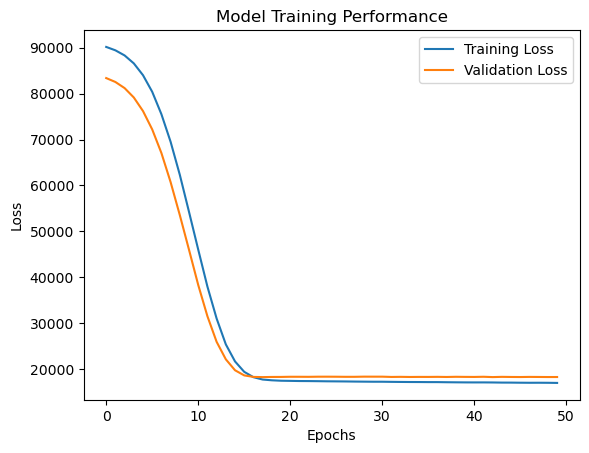

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[284.3285 ],
       [243.39943],
       [248.27992],
       [207.18486],
       [349.00104],
       [317.59525],
       [307.70926],
       [276.75342],
       [290.0351 ],
       [274.2516 ],
       [238.8491 ],
       [271.99817],
       [269.28674],
       [233.63336],
       [306.9345 ],
       [314.94803],
       [260.94827],
       [307.31726],
       [298.67523],
       [246.78745],
       [272.44827],
       [288.60672],
       [286.7849 ],
       [280.41412],
       [250.76517],
       [243.93973],
       [254.0847 ],
       [321.15698],
       [315.64807],
       [265.2154 ],
       [235.79074],
       [304.9856 ],
       [304.74084],
       [268.92145],
       [310.54364],
       [290.28436],
       [213.58813],
       [264.62488],
       [293.51038],
       [236.7868 ],
       [238.7132 ],
       [248.21057],
       [242.32626],
       [252.90137],
       [264.36365],
       [257.0287 ],
       [259.93   ],
       [257.54626],
       [293.94064],
       [288.73657],


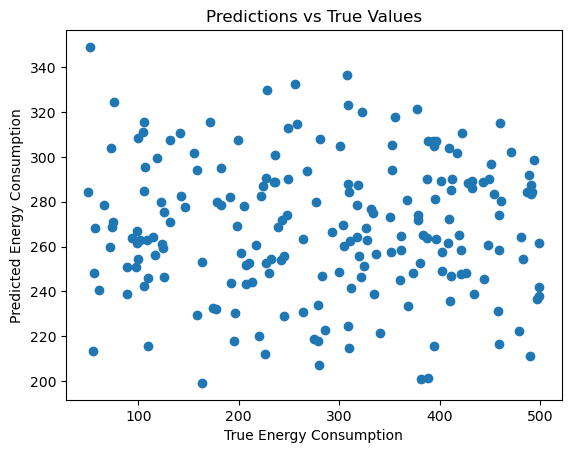

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()